# 第1课：行星能量收支

## 1. 什么是气候模式？

- 什么是气候？
- 什么是模式？

**气候**是
- 天气的统计，即温度和降水的时空平均
- （统计可能也是更高阶状态的平均：变化等）

**气候模式**最小定义：
表示地球系统和太空间能量交换，以及它对平均表面温度的影响。

注意行星能量收支。这是所有气候模拟的关键。

回到Wikipedia: http://en.wikipedia.org/wiki/Climate_model

气候模式用定量的方法模拟大气、海洋、陆面和海冰间的相互作用。它们用于各种目的，从研究气候系统的动力学到未来气候的预估。近几年讨论最多的关于气候模式的使用是预估来自温室气体大气浓度增加导致的温度变化。所有的气候模式都将来自太阳的短波电磁辐射，主要是可见光和短波（近红外），视为输入能量，以及来自地球的长波（远）红外电磁辐射作为输出能量。任何不平衡都会导致温度的变化。模式的范围可以从相对简单到相当复杂：

- 一个简单的辐射传热模型，将地球视为一个点，平均输出能量
- 这可以垂直扩展（辐射对流模式）或水平扩展
- 最后，（耦合）大气-海洋-海冰全球气候模式离散化并求解质量和能量转移与辐射交换的完整方程。

这不是一个完整的清单；例如“箱模式”可以处理跨海盆及海盆内部的洋流。此外，其他类型的模拟可以相互关联，如土地利用，使研究人员能够预测气候与生态系统之间的相互作用。

## 2. 观测的全球能量收支

下图显示当前全球，整个气候系统年平均能量通量的最佳估算。
我们在整个课程中将看到这些许多过程。

In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python2.7'

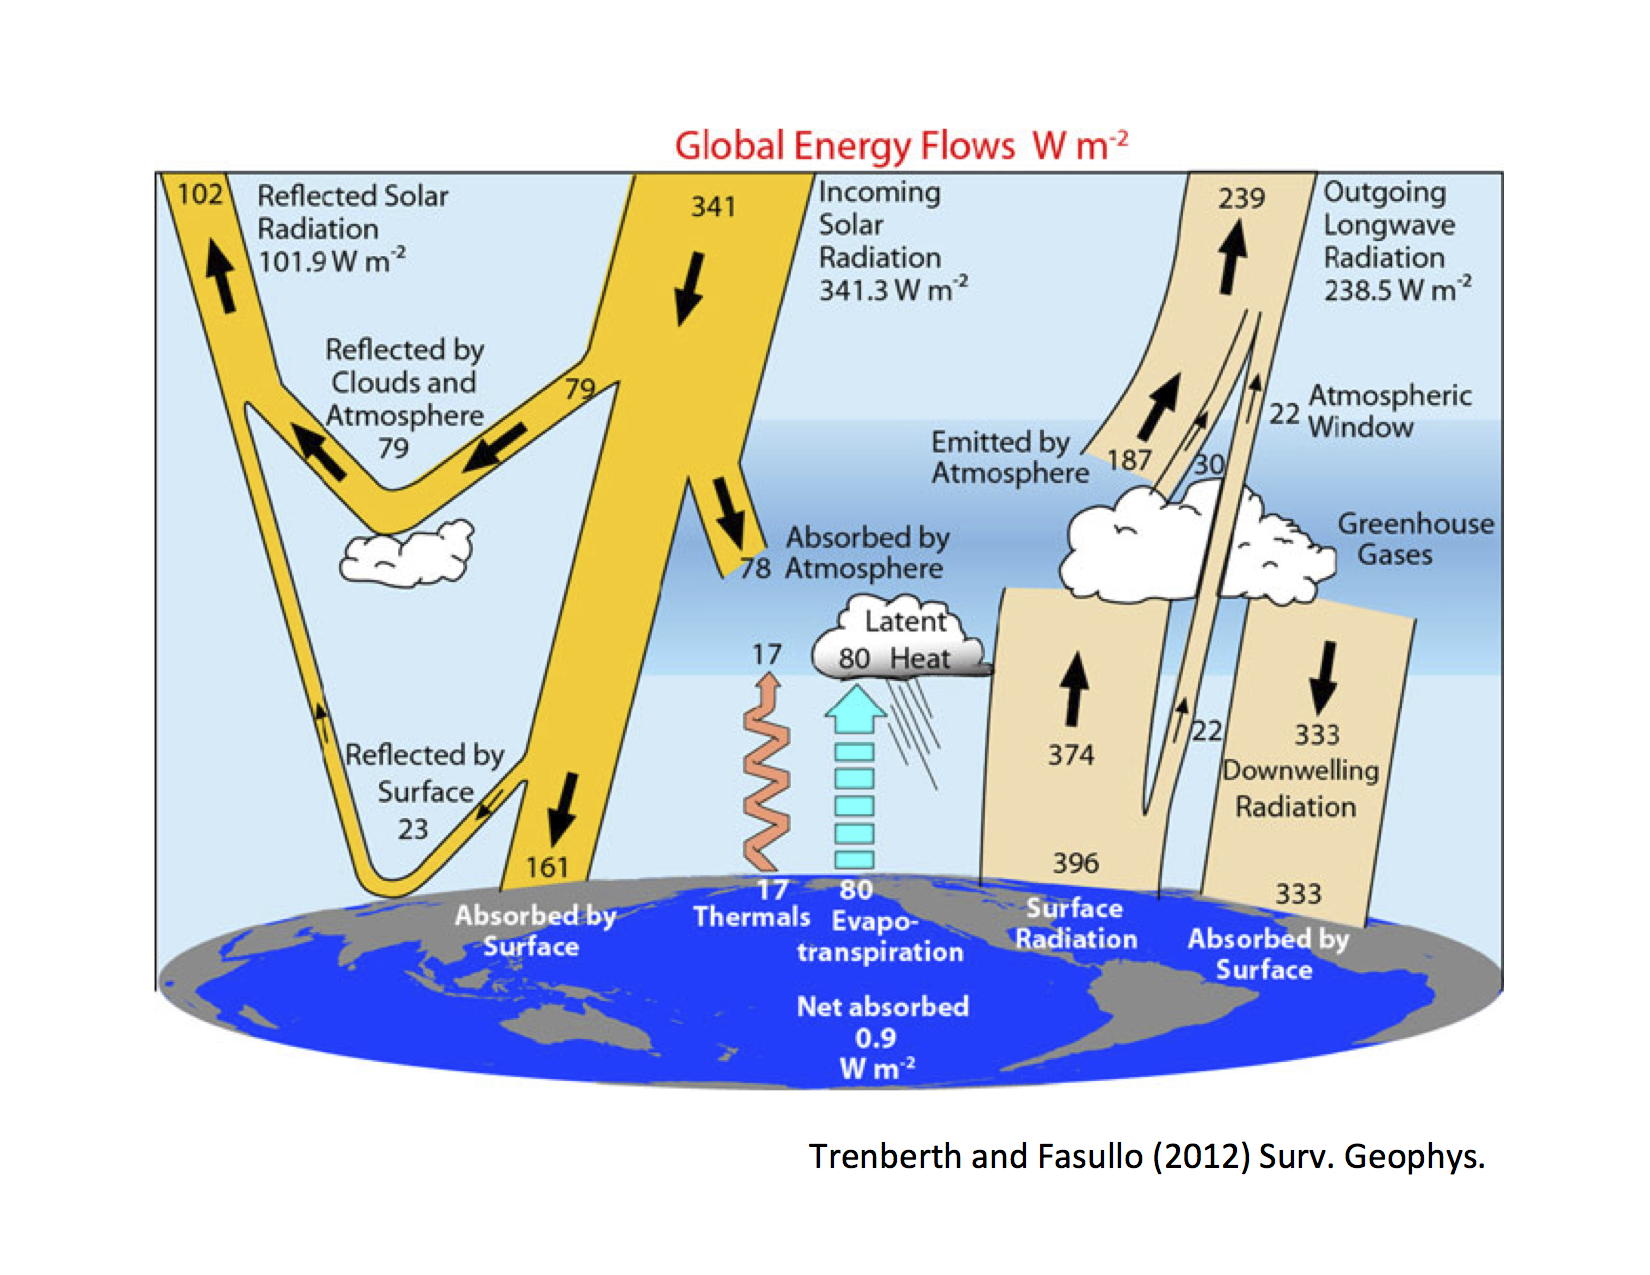

In [1]:
from IPython.display import Image
Image('./image/GlobalEnergyBudget.png')

### 注：

### 对于短波

- 全球平均反照率为$101.9 W m^{-2}/341.3 W m^{-2}=0.299$
- 云反射 = $79 W m^{-2}$
- 地表反射 = $23 W m^{-2}$
    - 云反射是地表发射的3倍
- 大气吸收 = $78 W m^{-2}$ (与云反射相当)    
哪种气体对短波吸收有贡献？
- 大部分是臭氧和水

### 对于长波

- 观测地表辐射 = $396 W m^{-2}$
- 非常接近温度$T = 288 K$ (全球平均表面温度)的黑体辐射$\sigma T^{4}$（一个黑体表面单位面积放出的能量正比于其绝对温度的4次方）
- 但辐射到太空非常少 = $239 W m^{-2}$ (温室效应影响)

### 净吸收 = $0.9 W m^{-2}$

### 格外注意：

- 这是能量收支，非温度收支
- 将讨论上述两者联系
- **云**影响收支的长波和短波

## 3. 量化行星能量收支

**全球海气系统的能量**收支：
\begin{align*} 
\frac{dE}{dt} &=  net\ energy\ flux\ in\ to\ system \\ 
 &= flux\ in - flux\ out
\end{align*}

其中E为总系统的焓或热含量。

我们在**每单位表面面积**上表示收支，因此上述每一项单位为$W m^{-2}$。

注：不同圈层间（例如，海洋、陆面、海冰和大气间）任意内部能量交换不出现在这个收支中，因为E为所有圈层的总和。

### 假定：

**对整个系统来说唯一重要的能量来源是来自太空和回到太空的辐射通量。**

模拟那些大气层顶（top-of-atmosphere, TOA）的通量。

进来的通量是入射的太阳辐射。太阳常数为
\begin{equation*}
S_0=1365.2 W m^{−2}
\end{equation*}

（所有值都与Trenberth and Fasullo图一致，除非有另外注释。）

这是单位区域来自太阳入射到垂直于光束方向的能量通量。

面积加权全球平均入射太阳通量为
\begin{equation*}
Q=S_0\frac{A_{cross-section}}{A_{surface}}
\end{equation*}

这里

- $A_{cross-section}$ = 光束单位圆面积 = $\pi a^2$
- $A_{surface}$ = 球表面面积 = $4\pi a^2$
- a = 地球半径

因此入射通量为$Q = S_0/4 = 341.3 W m^{-2}$

出去的通量有两部分：

- 反射的太阳辐射
- 逃逸的长波辐射

**OLR = outgoing longwave radiation = 地面辐射到太空** 

定义行星反照率：

- $\alpha$ = 反射的太阳通量/入射的太阳通量
- 或反射通量 = $\alpha Q = 101.9 W m^{-2}$ 
- 因此根据数据，$\alpha \approx 0.3$

定义 **ASR = absorbed solar radiation**
\begin{equation*}
ASR= incoming\ flux – reflected\ flux = Q−\alpha Q =(1−\alpha)Q
\end{equation*}

我们的能量收支为
\begin{equation*}
\frac{dE}{dt} = (1-\alpha)Q-OLR
\end{equation*}

注意：这是一个**普遍真实的陈述**。我们刚刚定义了一些术语，并作出了非常好的假设，即唯一重要的能源是与空间的辐射交换。

**这个方程是每个气候模式的起点。**

但目前为止，我们实际上还没有一个模式。我们只有一个收支的叙述。为使用这个收支做一个模式，我们需要将收支中的术语与大气-海洋系统的状态变量联系起来。

为此，我们最感兴趣的状态变量是**温度**——因为它直接与上述每项的物理性联系在一起。

## 4. 最简单的气候模式：

### 零维能量平衡模式（energy balance model, EBM）

假设地球行为像个黑体辐射器，有效全球平均辐射温度$T_e$：

则

\begin{equation*}
OLR = \sigma T_e^4
\end{equation*}

其中$\sigma = 5.67\times10^{-8} W m^{-2} k^{-4}$为Stefan-Boltzmann常数。


**我们可以把它作为辐射温度的定义。**

也假定

\begin{equation*}
E=CT_s
\end{equation*}

这里$T_s$为全球平均表面温度，$C$为常数——大气-海洋单柱的有效热能。

$C$单位为$J m^{-2} K^{-1}$。


为什么？稍后我们会更仔细地看待这个问题，但主要是因为**流体的内部能量与其温度成正比**。当你给他们添加能量时，水和空气升温！

我们用**表面温度来**表征E，主要是因为大部分的热容都在海洋中。

现在我们收支是

\begin{equation*}
C\frac{dT_s}{dt} = (1-\alpha)Q-\sigma T_e^4
\end{equation*}

当ASR = OLR，时间导数为零，**气候系统是平衡的**。

当辐射温度精确为

\begin{equation*}
\overline{T_e}=\left(\frac{(1-\alpha)Q}{\sigma}\right)^{\frac{1}{4}}
\end{equation*}

这是成立的，其中上划线表示平衡。

放进我们观测收支的数，我们发现$\bar{T_e}=255K$

- 如果地球作为黑体在温度255K处辐射，全球能量收支平衡，表面温度没有变化。
- 如果地球在较高[较低]黑体温度辐射，大气-海洋系统将失去[得到]能量，表面温度将降低[增加]。

注意我们依赖时间的收支是一个包含两个未知数，$T_s$和$T_e$，的单一方程。

为此，我们将假定$C$，$\alpha$和$Q$都是固定的——尽管在整个课程中我们将讨论这些项变化的原因。